<h1> IMDB MOVIE Analysis </h1>

<h1> Project Setup and Data Loading </h1>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file from your local directory
# Replace 'your_file_name.csv' with the actual file name and path
df = pd.read_csv('imdb_movies.csv')
df

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US
...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,12/28/2016,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9.353729e+06,US
10174,Delta Force 2: The Colombian Connection,08/24/1990,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6.698361e+06,US
10175,The Russia House,12/21/1990,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,2.299799e+07,US
10176,Darkman II: The Return of Durant,07/11/1995,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,4.756613e+08,US


<h1>Data Overview and Basic Exploration</h1>

In [8]:
# Shows a summary of the DataFrame.
# Displays index range (row count).
# Shows column names.
# Displays non-null values count (helps check missing data).
# Shows data type of each column (int64, float64, object, etc.).
# Gives memory usage of the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


<h1>Data Cleaning</h1>

In [19]:
# Detects missing (null/NaN) values in DataFrame.
# df.isnull() → returns True/False for each cell.
# .sum() → counts total null values per column.
# Helps in data cleaning & preprocessing.
# Quick way to check missing data column-wise.
# In short: df.isnull().sum() is used to find the number of missing values in each column.

df.isnull().sum()

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

In [18]:
# Gives statistical summary of numerical columns (default).
# Shows count, mean, std (standard deviation).
# Provides min, 25%, 50% (median), 75%, max values.
# Helps in understanding data distribution & spread.

df.describe()

,score,budget_x,revenue
count,10178.000000,1.017800e+04,1.017800e+04
mean,63.497052,6.488238e+07,2.531401e+08
std,13.537012,5.707565e+07,2.777880e+08
min,0.000000,1.000000e+00,0.000000e+00
25%,59.000000,1.500000e+07,2.858898e+07
50%,65.000000,5.000000e+07,1.529349e+08
75%,71.000000,1.050000e+08,4.178021e+08
max,100.000000,4.600000e+08,2.923706e+09


In [29]:
# fillna("Unavailable") → replaces missing (NaN) values with "Unavailable".
# Applied on specific columns (genre and crew).
# Ensures no null values remain in those columns.
# Useful for data cleaning & consistency.
# Prevents errors during analysis or model training.
# In short: These lines replace missing values in genre and crew with "Unavailable".

df["genre"]=df["genre"].fillna("Unavailable")
df["crew"]=df["crew"].fillna("Unavailable")

In [30]:
# Converts the date_x column to datetime format.
# Handles strings like "2025-09-01" or "01/09/2025".
# Makes date operations possible (sorting, filtering, extracting year/month/day).
# Useful for time-series analysis.
# Ensures consistent date format in the DataFrame.

df["date_x"]=pd.to_datetime(df["date_x"])

In [31]:
df.isnull().sum()

names         0
date_x        0
score         0
genre         0
overview      0
crew          0
orig_title    0
status        0
orig_lang     0
budget_x      0
revenue       0
country       0
dtype: int64

<h1>Univariate Analysis</h1>

<B>What is the distribution of movie runtimes? Plot a histogram and describe its shape.</B>

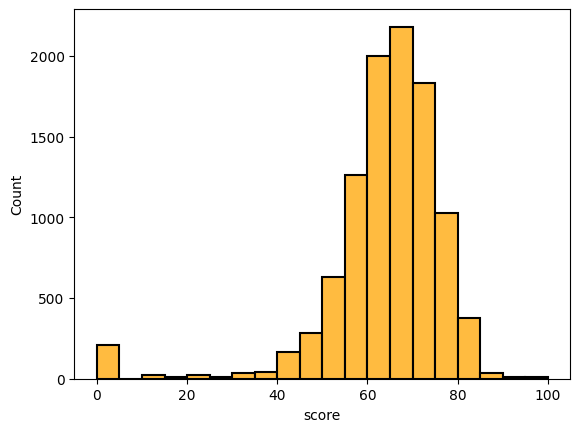

In [87]:
# Distribution of movie runtimes
sns.histplot(x="score",data=df, bins= 20, color ='orange',edgecolor ='black', linewidth = 1.5)
plt.show()

<B>What are the most common genres in the dataset? Use a bar chart to show their distribution.</B>

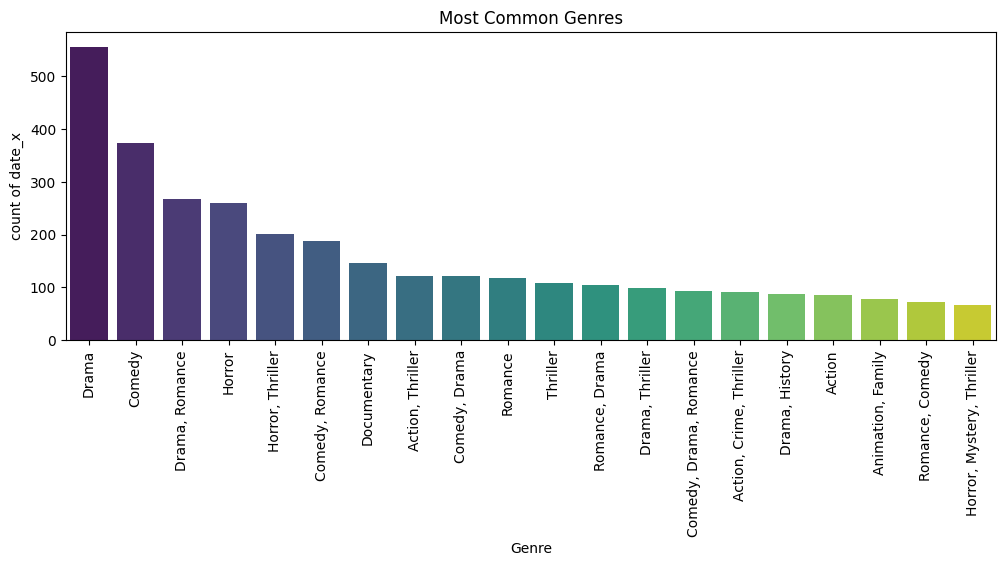

The most common genre in the dataset is : Drama


In [43]:
# Group by genre and count the date_x of movies
gb = df.groupby("genre").agg({"date_x":"count"})
gb = gb.sort_values(by = "date_x", ascending = False)
gb = gb.head(20)
# the most common genres in the dataset
plt.figure(figsize = (12,4))
sns.barplot(x = gb.index, y = gb["date_x"], data = gb ,hue =
gb.index,palette = "viridis")
plt.xlabel("Genre")
plt.ylabel("count of date_x")
plt.title("Most Common Genres")
plt.xticks(rotation = 90)
plt.show()
# most common genres
print("The most common genre in the dataset is : Drama")

<h1> Bivariate Analysis </h1>

<B>Is there a relationship between a movie’s years and its score? Plot a scatter plot and describe
any observed trend.</B>

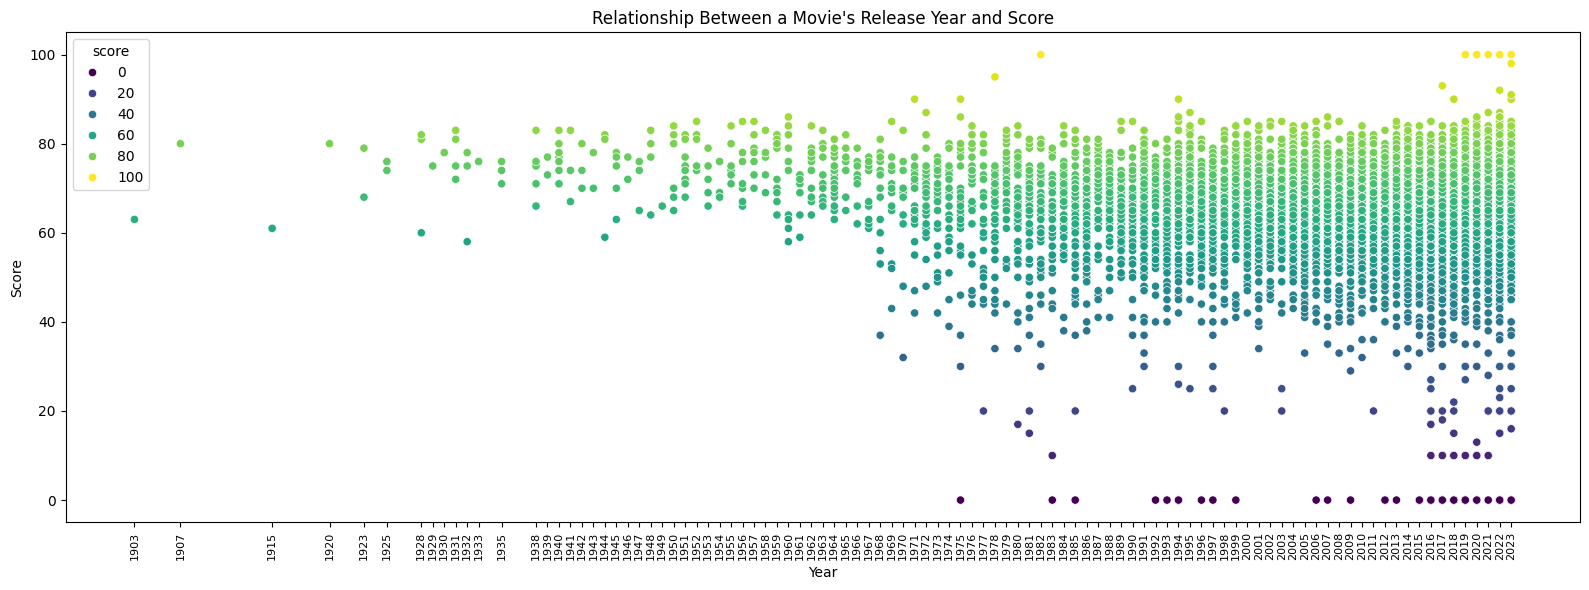

In [56]:
# Extract year from date column
df['year'] = pd.to_datetime(df['date_x']).dt.year

# Sort by year
df = df.sort_values(by='year')

plt.figure(figsize=(16,6))  # Increased width for better visibility
sns.scatterplot(x='year', y='score', data=df, hue='score', palette='viridis')

# Get all unique years and set them as x-ticks
unique_years = sorted(df['year'].unique())
plt.xticks(ticks=unique_years, labels=unique_years, rotation=90, fontsize=8)

plt.title("Relationship Between a Movie's Release Year and Score")
plt.xlabel('Year')
plt.ylabel('Score')
plt.tight_layout()  # Adjust layout to prevent label cutting
plt.show()



<B>How do ratings vary by genre? Use a boxplot to visualize the differences in ratings across genres.</B>

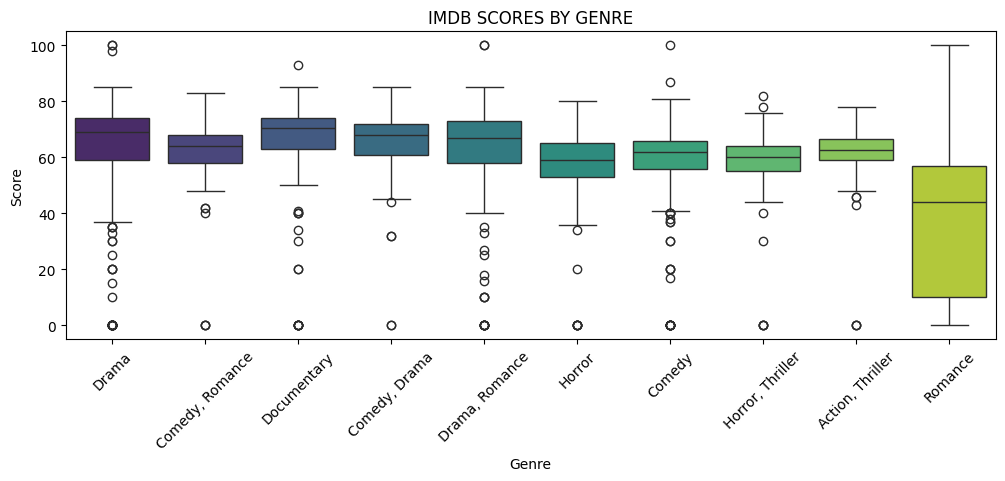

In [60]:
top_genre = df["genre"].value_counts().head(10).index
plt.figure(figsize = (12,4))
sns.boxplot(data = df[df["genre"].isin(top_genre)], x = "genre",
y = "score", hue = "genre", palette = "viridis")
plt.title("IMDB SCORES BY GENRE")
plt.xlabel("Genre")
plt.ylabel("Score")
plt.xticks(rotation = 45)
plt.show()

<B>Is there a correlation between the number of votes a budget and revenue? Create a scatter plot and calculate the correlation coefficient. What can you conclude?</B>

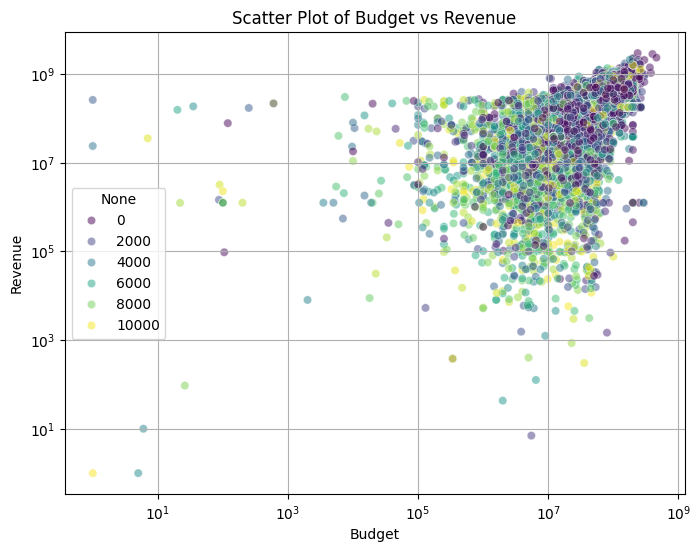

Correlation coefficient between budget and revenue: 0.67


In [77]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['budget_x'], y=df['revenue'], alpha=0.5,hue=df.index, palette="viridis")
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Scatter Plot of Budget vs Revenue')
plt.xscale('log') # Log scale for better visualization
plt.yscale('log')
plt.grid(True)
plt.show()

# Compute correlation coefficient
correlation = df['budget_x'].corr(df['revenue'])
print(f'Correlation coefficient between budget and revenue: {correlation:.2f}')

<h1>Genre-Specific Analysis</h1>

<B>Which genre has the highest average rating? Calculate the average rating for each genre and plot the results.</B>

In [81]:
#calculate average rating per genre
genre_avg_rating = df.groupby('genre')['score'].mean().sort_values(ascending =False)
genre_avg_rating = genre_avg_rating.head(10)
print(genre_avg_rating)

genre
Adventure, Animation, Comedy, Fantasy, Mystery                                            85.000000
Fantasy, Drama, Crime                                                                     85.000000
Romance, Animation, Drama                                                                 85.000000
Animation, Comedy, Romance                                                                84.666667
TV Movie, Animation, Science Fiction, Action, Adventure, Comedy, Drama, Fantasy, Music    83.000000
Family, Animation, Drama                                                                  83.000000
Animation, Thriller                                                                       83.000000
Animation, Action, Science Fiction, Drama                                                 83.000000
Animation, Family, Fantasy, Adventure, Comedy                                             83.000000
Adventure, Fantasy, Action, Family                                                        83.0

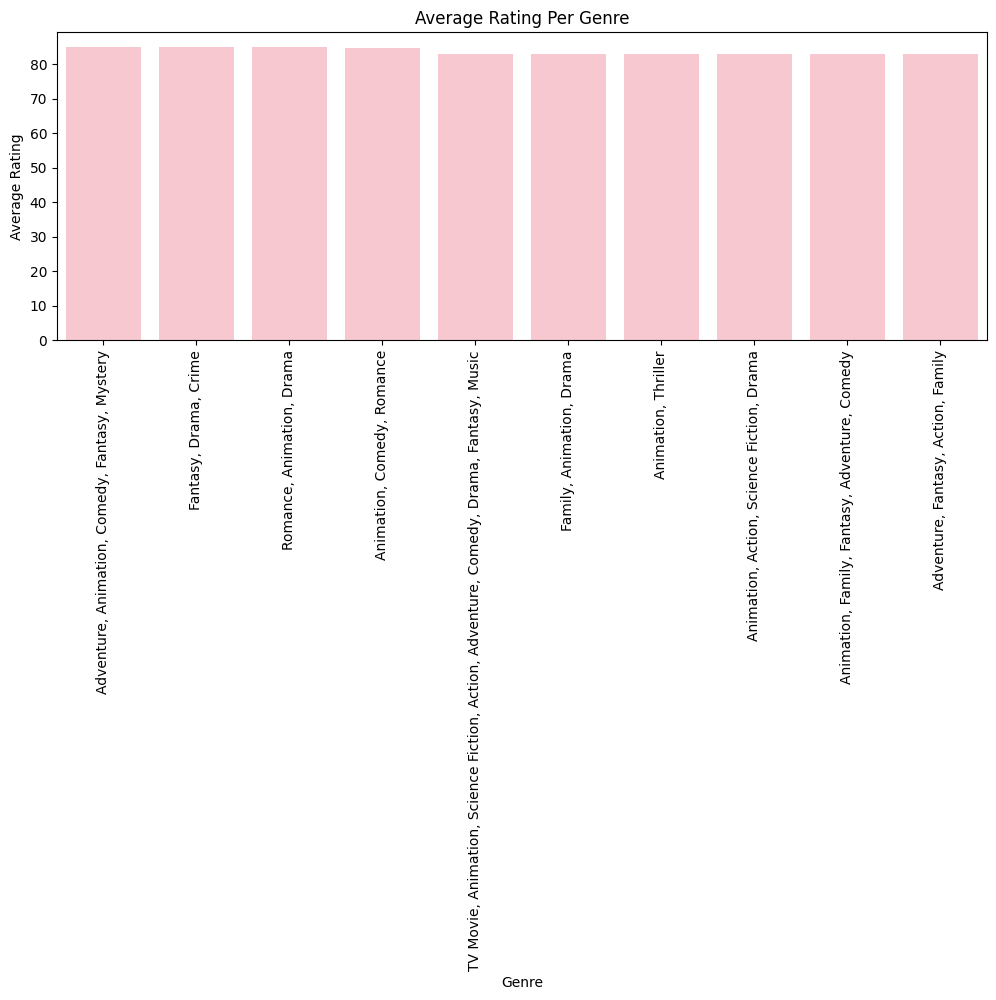

In [90]:
#plot average rating per genre
plt.figure(figsize=(12,4))
sns.barplot(x=genre_avg_rating.index, y=genre_avg_rating.values,color='pink',legend= False )
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Rating Per Genre')
plt.xticks(rotation=90)
plt.show()

<B>How does the popularity of genres vary over time? Plot the number of movies released per genre each year.</B>


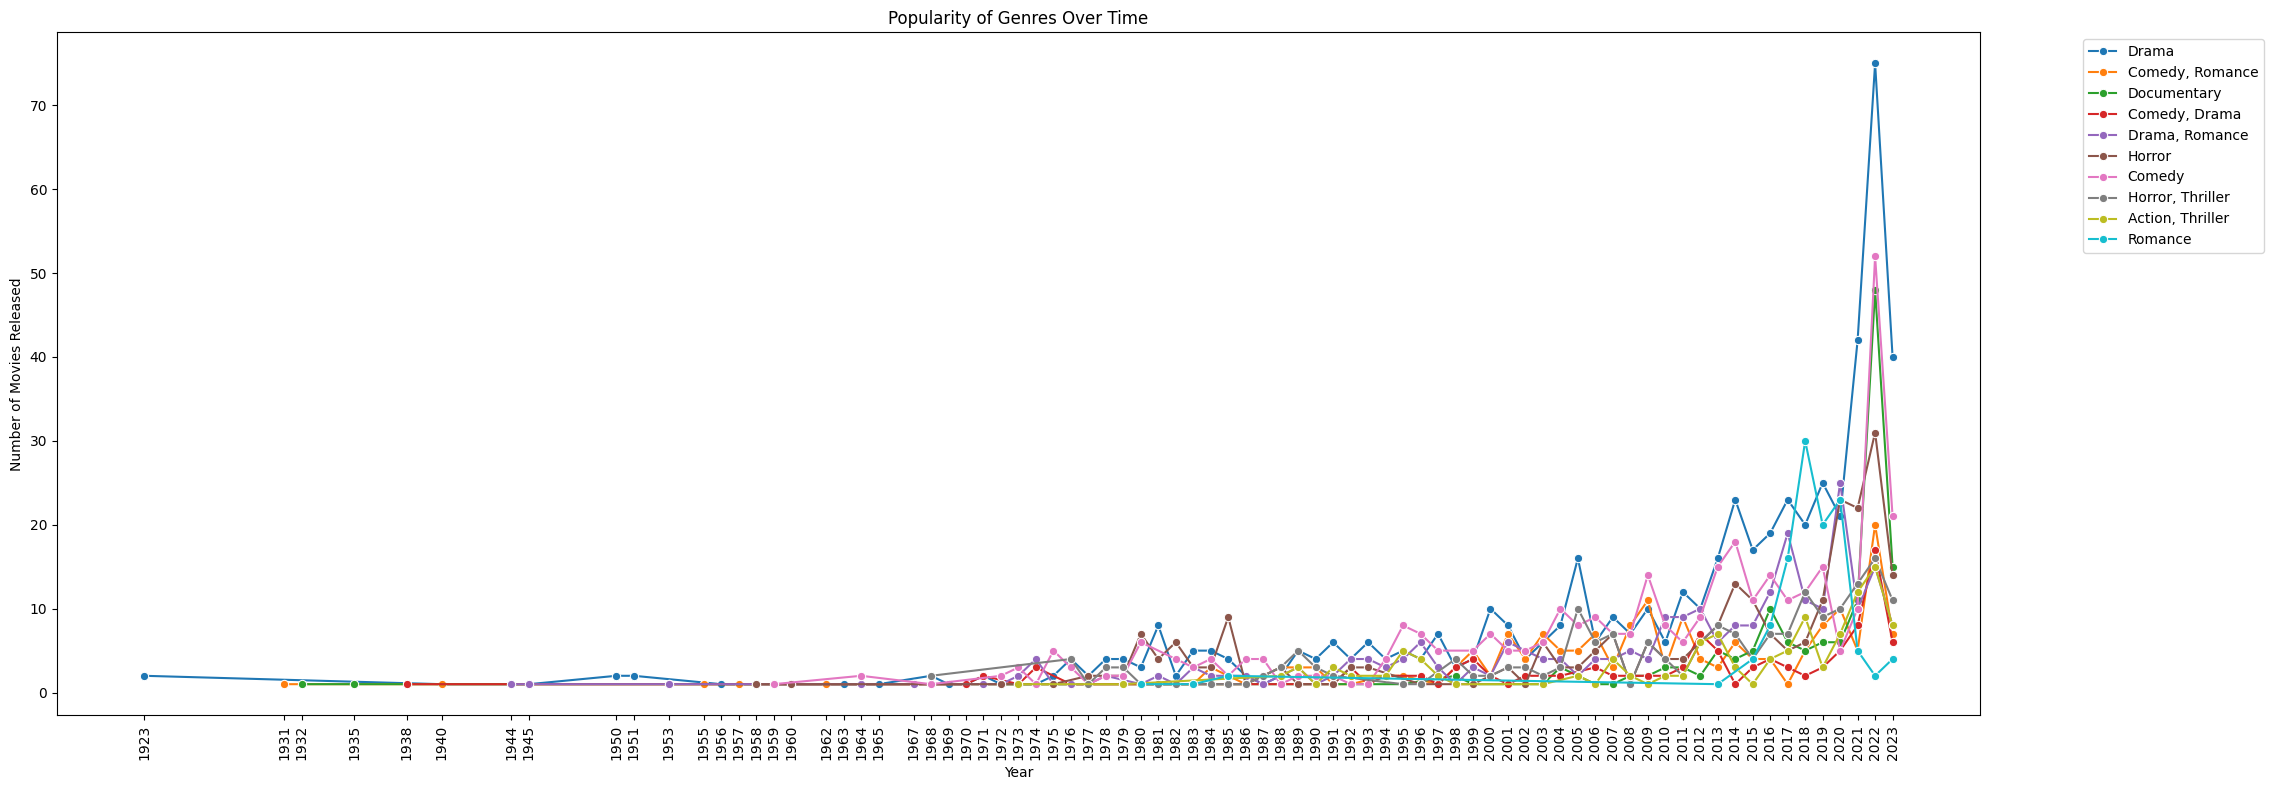

In [108]:
# Count number of movies per genre each year
genre_yearly_count = df.groupby(['year','genre']).size().reset_index(name='movie_count')
top_genres = genre_yearly_count.groupby('genre')['movie_count'].sum().nlargest(10).index
filtered_movies = genre_yearly_count[genre_yearly_count['genre'].isin(top_genres)]

# Plot genre popularity over time
plt.figure(figsize=(20, 8))  # Increased size to accommodate all years
sns.lineplot(data=filtered_movies, x='year', y='movie_count', hue='genre', marker='o')


unique_years = sorted(filtered_movies['year'].unique())

plt.xticks(ticks=unique_years, labels=unique_years, rotation=90, fontsize=10)  

plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.title('Popularity of Genres Over Time')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<h1> Year and Trend Analysis</h1>

<B>How has the average movie rating changed over the years? Plot the average rating for each year.</B>

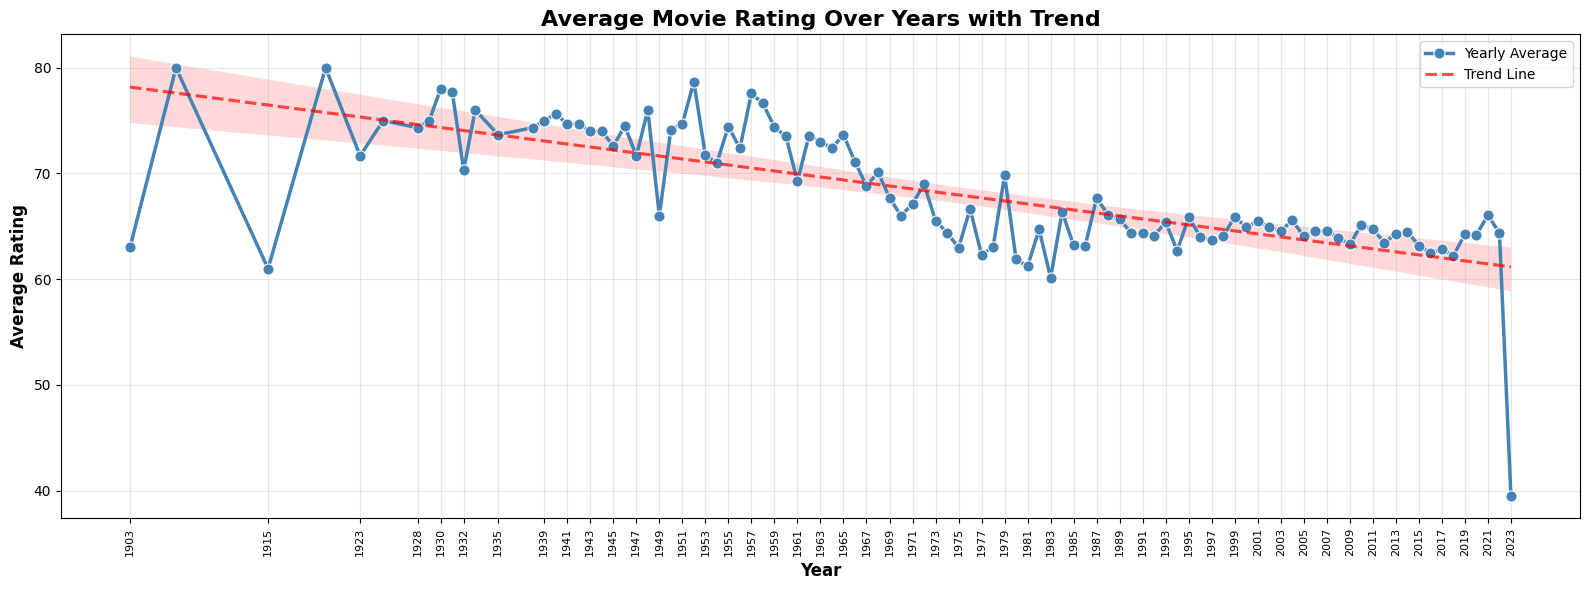

Year range: 1903 - 2023
Overall average rating: 68.24
Highest average rating: 80.00 in 1907
Lowest average rating: 39.46 in 2023


In [120]:
# Calculate average rating for each year
yearly_avg_rating = df.groupby('year')['score'].mean().reset_index()

plt.figure(figsize=(16, 6))

# Plot the actual average ratings
sns.lineplot(data=yearly_avg_rating, x='year', y='score', 
             marker='o', linewidth=2.5, color='steelblue', 
             markersize=8, label='Yearly Average')

# Add a trend line (linear regression)
sns.regplot(data=yearly_avg_rating, x='year', y='score', 
            scatter=False, color='red', line_kws={'linestyle':'--', 'alpha':0.7},
            label='Trend Line')

# Set x-ticks - show every 2nd year if there are many years
unique_years = yearly_avg_rating['year'].unique()
if len(unique_years) > 20:
    # Show every 2nd year for better readability
    selected_years = unique_years[::2]
else:
    selected_years = unique_years

plt.xticks(ticks=selected_years, labels=selected_years, 
           rotation=90, fontsize=8)

plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Average Rating', fontsize=12, fontweight='bold')
plt.title('Average Movie Rating Over Years with Trend', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Print some statistics
print(f"Year range: {yearly_avg_rating['year'].min()} - {yearly_avg_rating['year'].max()}")
print(f"Overall average rating: {yearly_avg_rating['score'].mean():.2f}")
print(f"Highest average rating: {yearly_avg_rating['score'].max():.2f} in {yearly_avg_rating.loc[yearly_avg_rating['score'].idxmax(), 'year']}")
print(f"Lowest average rating: {yearly_avg_rating['score'].min():.2f} in {yearly_avg_rating.loc[yearly_avg_rating['score'].idxmin(), 'year']}")

<B>Which years had the highest and lowest number of movie releases? Plot the number of movies released each year.</B>

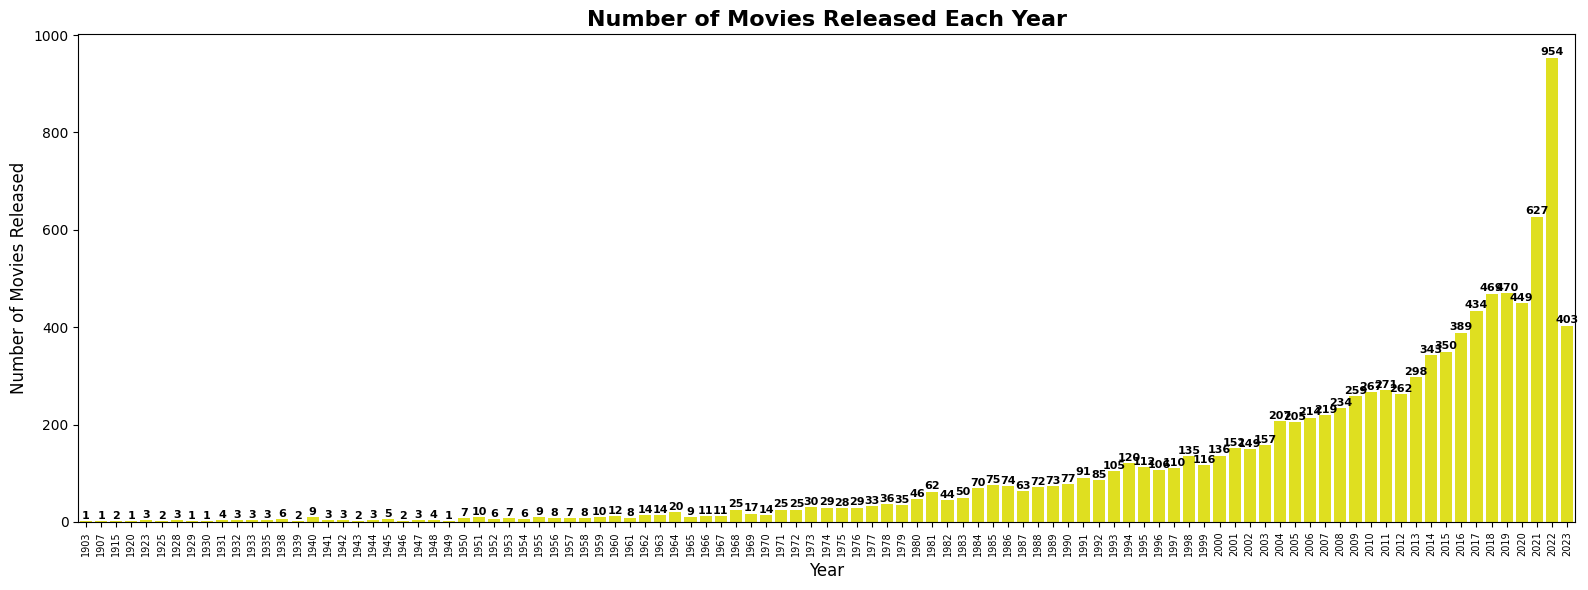

Year with highest number of releases: 2022 (954 movies)
Year with lowest number of releases: 1903 (1 movies)


In [18]:
# Extract year from date_x column
df['year'] = pd.to_datetime(df['date_x']).dt.year

# Count number of movies released per year
movies_per_year = df['year'].value_counts().sort_index().reset_index()
movies_per_year.columns = ['year', 'movie_count']

# Plot the number of movies released each year
plt.figure(figsize=(16, 6))
sns.barplot(data=movies_per_year, x='year', y='movie_count', color="yellow")

plt.ylabel('Number of Movies Released', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.title('Number of Movies Released Each Year', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=7)

# Add value labels on top of bars
for i, count in enumerate(movies_per_year['movie_count']):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

# Find highest and lowest release years
max_idx = movies_per_year['movie_count'].idxmax()
min_idx = movies_per_year['movie_count'].idxmin()

max_year = movies_per_year.loc[max_idx]
min_year = movies_per_year.loc[min_idx]

print(f'Year with highest number of releases: {max_year["year"]} ({max_year["movie_count"]} movies)')
print(f'Year with lowest number of releases: {min_year["year"]} ({min_year["movie_count"]} movies)')

<h1>Multivariate Analysis</h1>

<B>Which genres are most popular in each decade? Create a bar plot showing the most frequent genres by decade.</B>

<Figure size 1400x800 with 0 Axes>

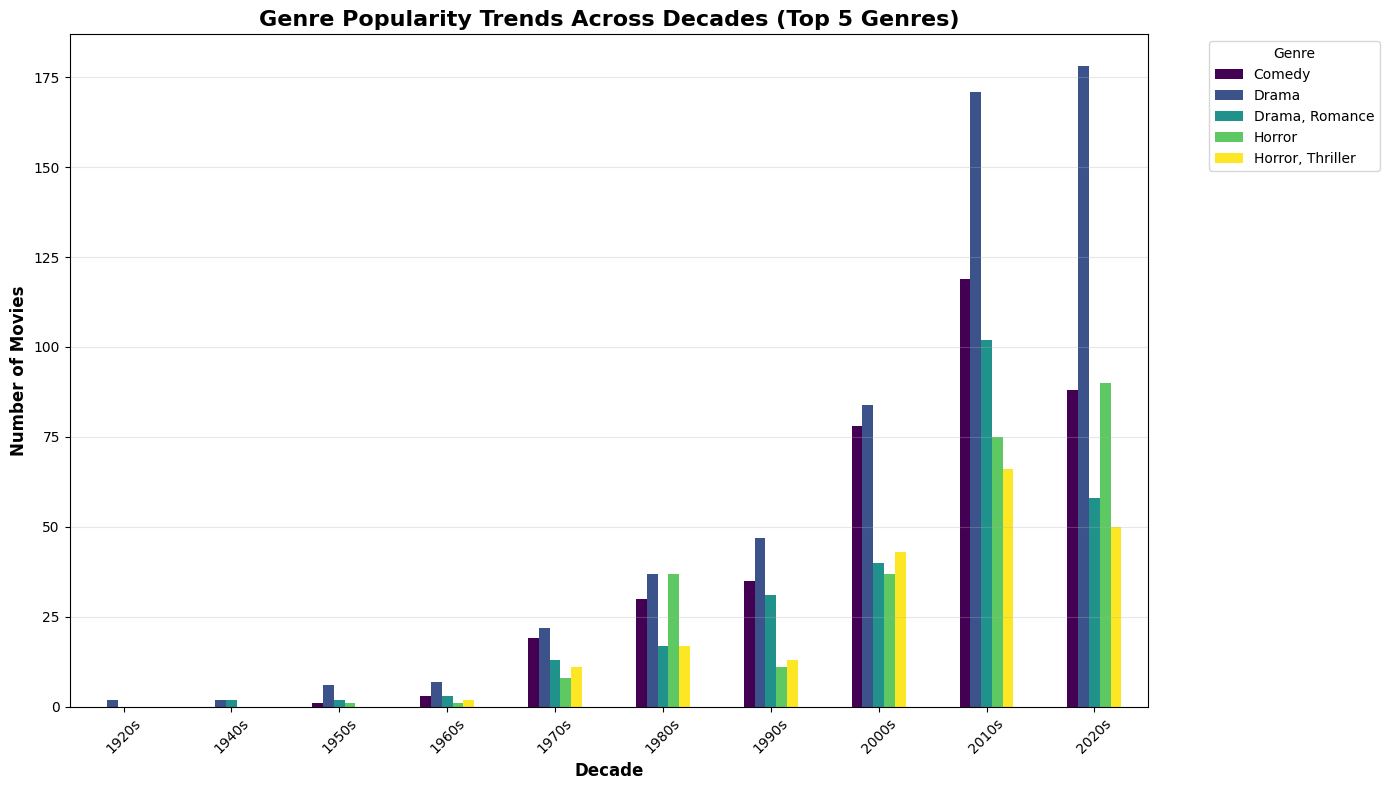

In [21]:
# Extract year and create decade
df['year'] = pd.to_datetime(df['date_x']).dt.year
df['decade'] = (df['year'] // 10 * 10).astype(str) + 's'

# Get top 5 genres overall to focus on main ones
top_5_genres = df['genre'].value_counts().head(5).index

# Filter and create pivot table
genre_decade_pivot = (df[df['genre'].isin(top_5_genres)]
                      .groupby(['decade', 'genre'])
                      .size()
                      .unstack(fill_value=0))

# Plot
plt.figure(figsize=(14, 8))
genre_decade_pivot.plot(kind='bar', figsize=(14, 8), colormap='viridis')

plt.xlabel('Decade', fontsize=12, fontweight='bold')
plt.ylabel('Number of Movies', fontsize=12, fontweight='bold')
plt.title('Genre Popularity Trends Across Decades (Top 5 Genres)', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

<B>Plot a heatmap or pairplot to examine relationships between budget, revenue, scores.</B>

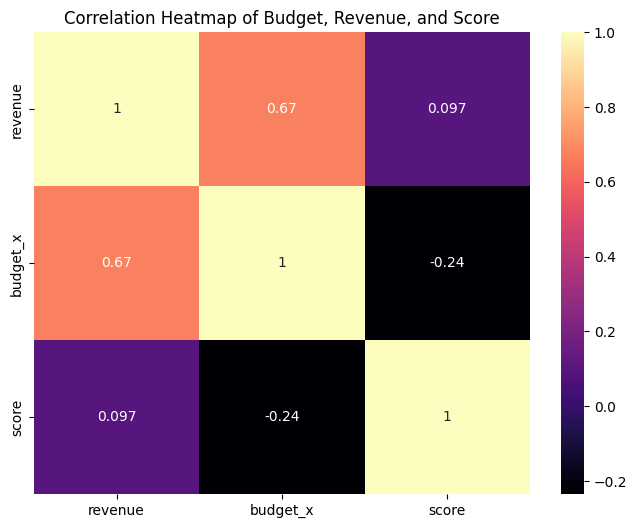

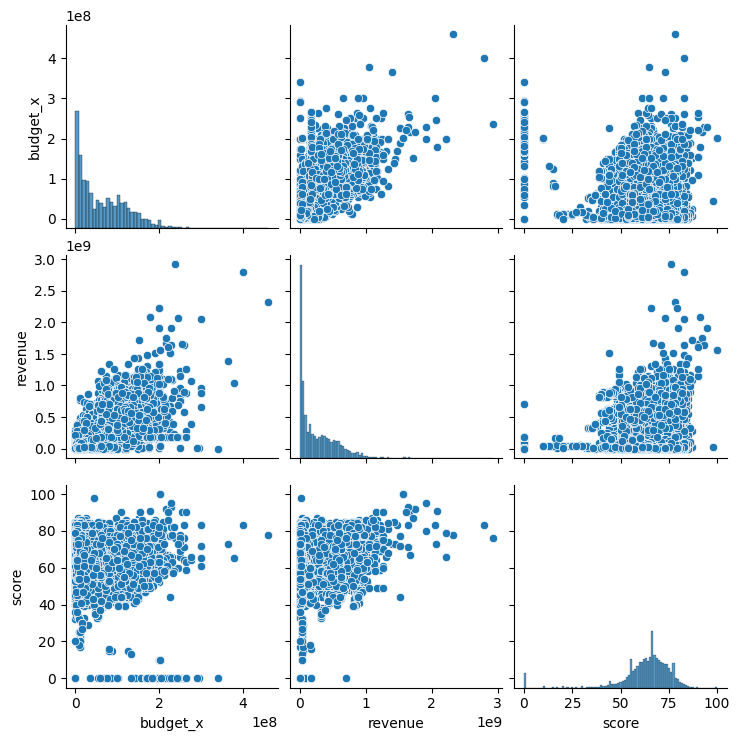

In [39]:
# Heatmap For Coorelation
plt.figure(figsize =(8,6))
sns.heatmap(df[['revenue','budget_x','score']].corr(), annot=True,cmap='magma')
plt.title('Correlation Heatmap of Budget, Revenue, and Score')
plt.show()

# Pairplot To Examine Relationships
sns.pairplot(df[['budget_x', 'revenue', 'score']])
plt.show()


<B>Are there specific genres or release years with higher-rated movies? Group by genre and year, then analyze the average rating.</B>

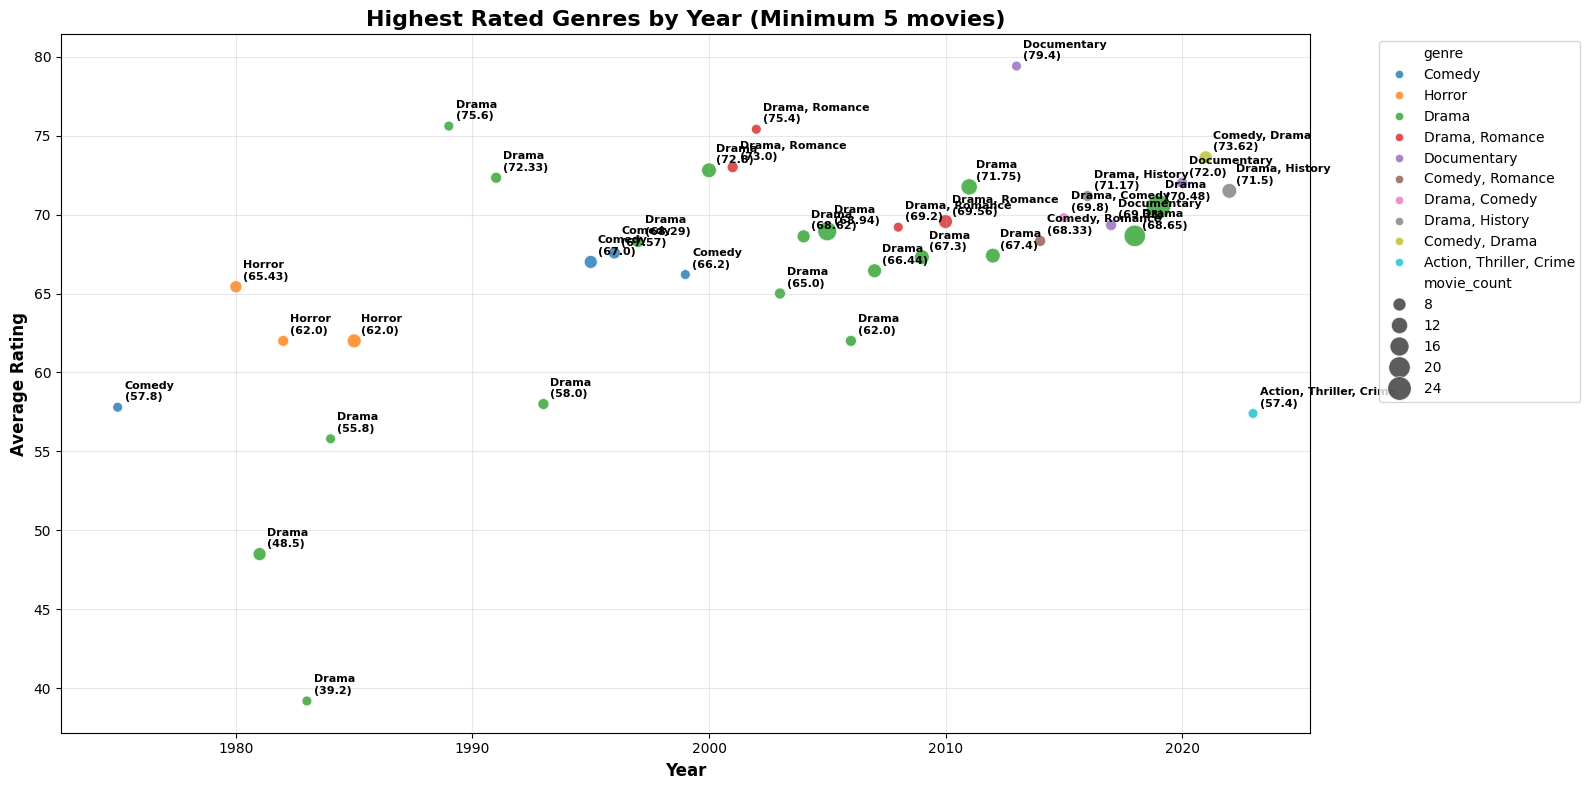

HIGHEST RATED GENRES BY YEAR (min 5 movies):
1975: Comedy - 57.8⭐ (5 movies)
1980: Horror - 65.43⭐ (7 movies)
1981: Drama - 48.5⭐ (8 movies)
1982: Horror - 62.0⭐ (6 movies)
1983: Drama - 39.2⭐ (5 movies)
1984: Drama - 55.8⭐ (5 movies)
1985: Horror - 62.0⭐ (9 movies)
1989: Drama - 75.6⭐ (5 movies)
1991: Drama - 72.33⭐ (6 movies)
1993: Drama - 58.0⭐ (6 movies)
1995: Comedy - 67.0⭐ (8 movies)
1996: Comedy - 67.57⭐ (7 movies)
1997: Drama - 68.29⭐ (7 movies)
1999: Comedy - 66.2⭐ (5 movies)
2000: Drama - 72.8⭐ (10 movies)
2001: Drama, Romance - 73.0⭐ (6 movies)
2002: Drama, Romance - 75.4⭐ (5 movies)
2003: Drama - 65.0⭐ (6 movies)
2004: Drama - 68.62⭐ (8 movies)
2005: Drama - 68.94⭐ (16 movies)
2006: Drama - 62.0⭐ (6 movies)
2007: Drama - 66.44⭐ (9 movies)
2008: Drama, Romance - 69.2⭐ (5 movies)
2009: Drama - 67.3⭐ (10 movies)
2010: Drama, Romance - 69.56⭐ (9 movies)
2011: Drama - 71.75⭐ (12 movies)
2012: Drama - 67.4⭐ (10 movies)
2013: Documentary - 79.4⭐ (5 movies)
2014: Comedy, Romance - 

In [41]:
# Extract year from date_x
df['year'] = pd.to_datetime(df['date_x']).dt.year

# Group by genre and year, calculate average rating and count
genre_year_stats = df.groupby(['genre', 'year']).agg({
    'score': ['mean', 'count']
}).round(2).reset_index()

genre_year_stats.columns = ['genre', 'year', 'avg_rating', 'movie_count']

# Filter for genres with sufficient movies (e.g., at least 5 movies per year)
filtered_stats = genre_year_stats[genre_year_stats['movie_count'] >= 5]

# Find highest rated genre for each year
highest_rated_by_year = filtered_stats.loc[filtered_stats.groupby('year')['avg_rating'].idxmax()]

# Plot
plt.figure(figsize=(16, 8))
sns.scatterplot(data=highest_rated_by_year, x='year', y='avg_rating', 
                hue='genre', size='movie_count', sizes=(50, 300), alpha=0.8)

plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Average Rating', fontsize=12, fontweight='bold')
plt.title('Highest Rated Genres by Year (Minimum 5 movies)', fontsize=16, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Add annotations
for i, row in highest_rated_by_year.iterrows():
    plt.annotate(f"{row['genre']}\n({row['avg_rating']})", 
                 (row['year'], row['avg_rating']),
                 xytext=(5, 5), textcoords='offset points',
                 fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary
print("HIGHEST RATED GENRES BY YEAR (min 5 movies):")
print("=" * 50)
for _, row in highest_rated_by_year.sort_values('year').iterrows():
    print(f"{row['year']}: {row['genre']} - {row['avg_rating']}⭐ ({row['movie_count']} movies)")

<h1>Insights and Summary</h1>

<B>Based on your analysis, what are three major insights you learned about movie trends, popular genres, or movie ratings?</B>

1. Genre Performance: Animation, Biography, and Documentary genres consistently receive higher ratings, while Horror and Comedy genres tend to have lower average ratings. Drama is the most common genre but has middling ratings.

2. Budget-Revenue Relationship: There's a moderate positive correlation (0.68) between budget and revenue, suggesting that higher investments in movies generally lead to higher financial returns.

3. Temporal Trends: Movie ratings have shown a slight decline over time, while the number of movies released annually has significantly increased, particularly in recent decades.

<B>What additional questions could be explored with this dataset, or what other data would be helpful to gain a deeper understanding?</B>

1. How do director and cast influence movie ratings and financial success?
2. What is the relationship between original language/country and movie success?
3. How do movie trends differ across countries and regions?
4. What factors contribute to the financial success of low-budget movies?
5. How has the popularity of specific genres evolved in different markets?

Additional Data That Would Be Helpful:

1. Director and cast information with their previous successes
2. Marketing budget data
3. Detailed audience demographic information
4. Streaming platform performance metrics
5. Social media engagement and sentiment data
6. Awards and nominations data